# Caso práctico -  Análisis de las transacciones de un negocio ecommerce
### 📈 <b>Contexto del negocio y la situación:</b>

Imagina que eres un analista de datos trabjando para una empresa ecommerce minorista que vende una variedad de productos online, que van desde equipos electrónicos y ropa hasta artículos para el hogar y accesorios. Tu tarea es analizar las transacciones de los clientes desde 2023 para identificar tendencias, comprender el comportamiento del cliente y optimizar la gestión de inventario.

### 📍 <b>Objetivos:</b>

- Comprender el comportamiento del cliente: Analizar la frecuencia de las compras, el valor promedio de las compras y los productos más populares.
- Optimizar el inventario: Identificar productos con altas tasas de devolución para ajustar los niveles de inventario.
- Mejorar las ventas y el marketing: Identificar segmentos de clientes que puedan ser objetivos de campañas de marketing para aumentar las ventas.
- Opcional: utilizar algún modelo de ML para hacer segmentación de clientes, predicción de ventas, de Customer Churn u otras propuestas.

### 💾 Descripción de los datos
- TransactionID: Identificador único para cada transacción.
- CustomerID: Identificador único para cada cliente.
- TransactionDate: Fecha y hora de la transacción.
- ProductID: Identificador único para cada producto.
- ProductCategory: Categoría del producto (por ejemplo, Electrónica, Ropa, Artículos para el hogar).
- Quantity: Número de unidades compradas.
- Price: Precio por unidad del producto.
- PaymentMethod: Método de pago (por ejemplo, Tarjeta de crédito, PayPal, Transferencia bancaria).
- ReturnStatus: Indica si el artículo fue devuelto (Sí o No).
- CustomerFeedback: Rating del 1 al 10 que representa la valoración del cliente.
- DiscountApplied: Porcentaje de descuento que se ha aplicado sobre el producto.
- ShippingCost: Coste del envío en euros.

Esta plantilla te guiará a través del proceso de análisis inicial y pre-procesado de los datos, pero es solo una guía! Puedes añadir o quitar lo que creas conveniente o analizar otros aspectos que te parezcan interesantes. Recuerda que hay muchas formas de llegar al mismo resultado, y lo que más se valora es la proactividad! 😃

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
df_path = "./data_eda/ecommerce_data.csv"
df_customers_path = "./data_eda/ecommerce_customers.csv"

df = pd.read_csv(df_path)
df_customers = pd.read_csv(df_customers_path)

***

# 1. Exploración Inicial
El primer paso de cualquier análisis es realizar una exploración inicial de los datos. Entender qué tipo de información lleva cada columna, las unidades, los tipos de variables y tener una idea general de errores a gestionar en los siguientes pasos.

In [3]:
# Utiliza los métodos que conozcas para explorar el dataset
# ¿Cuántas filas y columnas tiene?

In [4]:
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,Price,PaymentMethod,ReturnStatus,CustomerFeedback,DiscountApplied,ShippingCost
0,TXN100000,CUST1012,2023-06-05 11:11:00,PROD215,books,NaN,238.10,Credit Card,Yes,4.344676,15.04,47.16
1,TXN100001,CUST1125,2023-03-13 13:16:59,PROD300,Home Goods,10,480.70,Bank Transfer,Yes,6.534869,13.70,30.15
2,TXN100002,CUST1377,2023-11-17 19:39:50,PROD230,Electronics,3,361.89,Credit Card,No,8.076073,19.09,15.58
3,TXN100003,CUST1379,2023-01-03 14:41:06,PROD283,Books,two,9.69,NaN,Yes,4.855980,31.34,35.70
4,TXN100004,CUST1044,2023-05-21 21:42:03,PROD214,Home Goods,NaN,351.01,Credit Card,No,2.042956,39.82,4.04


##### Podemos usar tail también porque a veces las primeras filas del data set nos pueden dar información engañosa y así podemos ver el dataset de una forma un poco más completa.

In [5]:
df.tail()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,Price,PaymentMethod,ReturnStatus,CustomerFeedback,DiscountApplied,ShippingCost
5045,TXN103906,CUST1044,2023-11-21 11:49:00,PROD264,Electronics,NaN,141.83,Credit Card,Yes,1.473920,44.12,19.28
5046,TXN103773,CUST1395,2023-04-21 10:28:53,PROD215,Accessories,2,138.73,Bank Transfer,Yes,1.024862,5.56,8.62
5047,TXN104635,CUST1171,2023-09-21 19:44:33,PROD282,Home Goods,10,186.68,PayPal,No,8.129287,42.87,NaN
5048,TXN103161,CUST1075,2023-09-04 21:02:06,PROD218,Home Goods,2,468.29,Bank Transfer,Yes,7.007066,48.25,NaN
5049,TXN102659,CUST1028,2023-08-13 09:53:09,PROD245,Accessories,2,71.06,Credit Card,No,7.712480,45.91,9.12


##### Otro método que puede ser útil es usar sample porque lo que hace es darnos al azar algunas filas. En este caso, debemos especificar entre paréntesis cuantas filas de muestra queremos.

In [6]:
# Coge filas aleatorias para ver de primeras algún error, hay que especificar número
df.sample(5) 

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,Price,PaymentMethod,ReturnStatus,CustomerFeedback,DiscountApplied,ShippingCost
4672,TXN104672,CUST1075,2023-12-25 16:07:04,PROD235,Clothing,1,495.93,Bank Transfer,Yes,0.000000,31.77,31.81
798,TXN100798,CUST1219,2023-12-19 02:25:23,PROD246,Clothing,2,139.93,Credit Card,No,4.229835,38.98,10.95
4810,TXN104810,CUST1137,2023-10-24 23:51:19,PROD266,Clothing,2,497.01,NaN,Yes,6.645090,18.11,24.37
3065,TXN103065,CUST1320,2023-07-16 11:43:30,PROD203,Clothing,4,119.41,Bank Transfer,No,6.223353,37.20,35.23
2764,TXN102764,CUST1178,2023-01-29 15:35:20,PROD269,Home Goods,2,216.11,Bank Transfer,No,2.175393,3.59,7.30


##### Usar df.shape es un atributo que nos da la oportunidad de ver lo grande que es nuestro dataset.

In [7]:
df.shape

(5050, 12)

##### El df.info es uno de los métodos más últiles que tenemos porque también nos da el tamaño total de nuestro dataset, pero también podemos ver si tenemos números nulos o de qué tipo son los datos que tenemos.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     5050 non-null   object 
 1   CustomerID        4802 non-null   object 
 2   TransactionDate   5050 non-null   object 
 3   ProductID         4959 non-null   object 
 4   ProductCategory   5050 non-null   object 
 5   Quantity          4432 non-null   object 
 6   Price             4995 non-null   float64
 7   PaymentMethod     3720 non-null   object 
 8   ReturnStatus      5050 non-null   object 
 9   CustomerFeedback  5050 non-null   float64
 10  DiscountApplied   4500 non-null   float64
 11  ShippingCost      4795 non-null   float64
dtypes: float64(4), object(8)
memory usage: 473.6+ KB


💡 Los tipos de variables más comunes que nos podemos encontrar:
- int64: valores enteros
- float64: valores decimales
- object: tipo de datos flexible que representa strings o tipos de datos mixtos (ej. alfanumérico)
- datetime64[ns]: fechas y horas
- bool: datos binarios (True/False)

¿Qué conclusiones sacas después de este análisis inicial?



***

##### Algunos cambios para hacer: 

- TransactionID es un object porque tiene letras y números aunque normalmente sean números. 
- En Customer ID pasa lo mismo, es un object.
- Transaction date al ser una fecha lo mismo.
- Quantity debería de ser un entero, pero nos lo pone como object.

##### Conclusiones:
- Gestionar nulls.
- Cambiar tipo de datos de Quantity y de TransactionDate.

Analizamos y visualizamos los datos numéricos:

In [9]:
# Realiza un análisis de las variables numéricas por un lado y las categóricas por otro, obteniendo métricas como
# count de filas, media, min y max, valores diferentes, etc

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4995.0,252.509037,141.454788,5.13,132.965000,249.040000,374.325000,499.910000
CustomerFeedback,5050.0,4.772651,1.803308,0.00,3.796587,4.768703,5.751396,8.704556
DiscountApplied,4500.0,25.243578,14.500435,0.01,12.677500,25.225000,37.852500,49.990000
ShippingCost,4795.0,24.808847,14.549380,0.01,11.925000,24.640000,37.680000,49.990000


Simplemente con el método describe puede ser bastante difícil analizar los datos con los que contamos. Por eso es mejor visualizar los datos.

<Axes: xlabel='Price'>

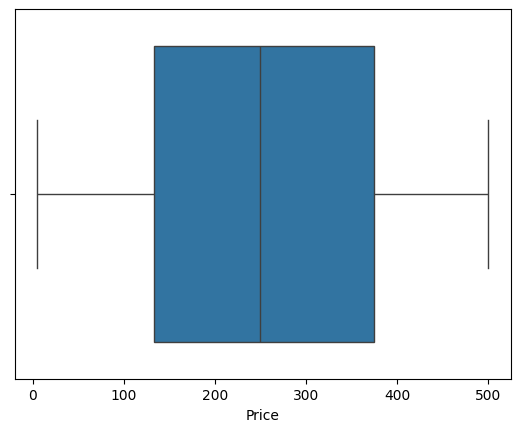

In [10]:
# Visualizar los datos
sns.boxplot(data=df, x='Price')

<Axes: xlabel='CustomerFeedback'>

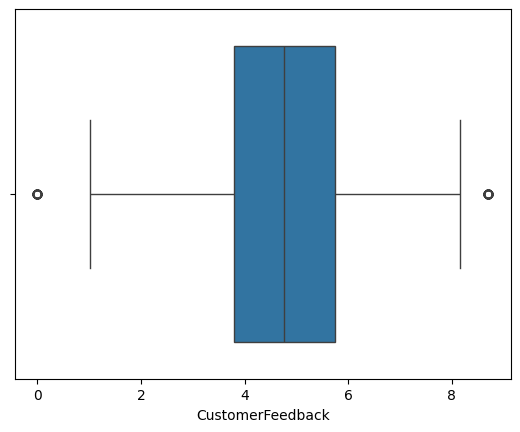

In [11]:
sns.boxplot(data=df, x='CustomerFeedback')

Lo que en boxplot aparecen como círculos pueden ser outliers, así que tendríamos que vigilarlos. En el caso de CustomerFeedback tenemos variables fuera de la gráfica.

<Axes: xlabel='CustomerFeedback', ylabel='Count'>

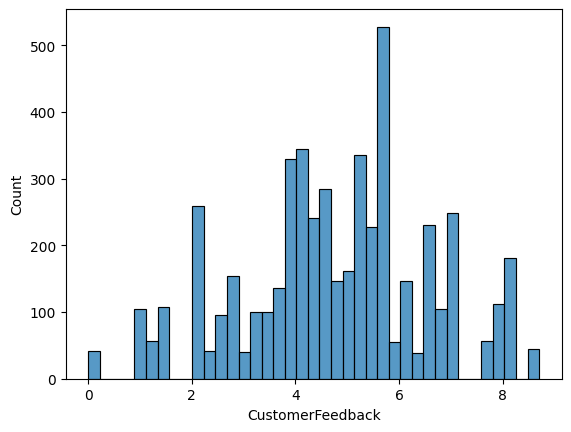

In [12]:
sns.histplot(data=df, x='CustomerFeedback')

En el caso de CustomerFeedback vemos que tiene una distribución más o menos por el medio y si nos vamos a Price parece que es una distribución uniforme.

<Axes: xlabel='Price', ylabel='Count'>

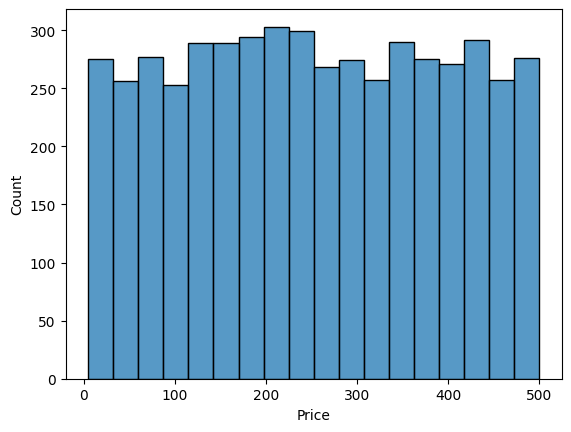

In [13]:
sns.histplot(data=df, x='Price')

En este análisis inicial también analizamos las variables categóricas. El método .describe() nos permite también incluir otros datos como los objetos.

In [14]:
# Variables categóricas
df.describe(include='object')

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PaymentMethod,ReturnStatus
count,5050,4802,5050,4959,5050,4432,3720,5050
unique,5000,501,4999,101,6,7,3,2
top,TXN102515,CUST1276,2023-10-27 02:00:59,PROD287,Electronics,two,Credit Card,No
freq,2,20,2,67,877,685,1301,2560


In [15]:
# Creamos una nueva variable para analizar los datos que nos interesan
columns_to_explore = ['ProductCategory', 'Quantity', 'PaymentMethod', 'ReturnStatus']
# Sacamos los datos unique y hacemos un bucle

for column in columns_to_explore:
    print(column,  ":" ,df[column].unique(), "\n")


ProductCategory : ['books' 'Home Goods' 'Electronics' 'Books' 'Clothing' 'Accessories'] 

Quantity : [nan '10' '3' 'two' '1' '4' '5' '2'] 

PaymentMethod : ['Credit Card' 'Bank Transfer' nan 'PayPal'] 

ReturnStatus : ['Yes' 'No'] 



Conclusiones:
- ProductCategory: con categorías iguales
- Quantity: gestionar nulls, strings y "two"
- PaymentMethod: nulls

## 2. Transformaciones y ajustes de variables
### 2.1 Gestión de nulos y campos vacíos
Lo primero a gestionar son los nulos, ya que tenerlos en nuestros datos nos impedirá hacer otras transformaciones.

In [16]:
# ¿Cuántos nulls hay por cada columna? ¿qué porcentaje del total representan?
df.isnull().sum()

TransactionID          0
CustomerID           248
TransactionDate        0
ProductID             91
ProductCategory        0
Quantity             618
Price                 55
PaymentMethod       1330
ReturnStatus           0
CustomerFeedback       0
DiscountApplied      550
ShippingCost         255
dtype: int64

Nos dice el número de filas que son null en cada columna, pero para saber si tenemos mucho en base al número de filas totales lo mejor es sacar porcentajes.

In [17]:
num_nulls = df.isnull().sum()
percent_nulls = (num_nulls / len(df)) * 100

print(percent_nulls.round(2))

TransactionID        0.00
CustomerID           4.91
TransactionDate      0.00
ProductID            1.80
ProductCategory      0.00
Quantity            12.24
Price                1.09
PaymentMethod       26.34
ReturnStatus         0.00
CustomerFeedback     0.00
DiscountApplied     10.89
ShippingCost         5.05
dtype: float64


Una cosa antes de avanzar en el análisis es crear un nuevo dataframe para no perder datos.

In [18]:
df_no_nulls = df.copy()

In [19]:
# ¿Qué estrategias se pueden seguir para gestionar los nulls?
# Implementa la que consideres apropiada para cada variable con nulls

In [20]:
df_no_nulls['CustomerID'].head()

0    CUST1012
1    CUST1125
2    CUST1377
3    CUST1379
4    CUST1044
Name: CustomerID, dtype: object

In [21]:
df_no_nulls['CustomerID'] = df_no_nulls['CustomerID'].fillna('Unknown')

In [22]:
df_no_nulls['PaymentMethod'].unique()

array(['Credit Card', 'Bank Transfer', nan, 'PayPal'], dtype=object)

En el caso de PaymentMethod lo que puede haber pasado es que algún dato se haya quedado sin registrar o que haya algún otro método de pago no contemplado como Bizum, por ejemplo. Lo primero sería ir al equipo de negocio para averiguarlo. Si no hay otro método de pago lo que podríamos hacer es rellenar esas filas con el método de pago más común. Es decir, usando la moda.

In [23]:
df_no_nulls['PaymentMethod'].mode()

0    Credit Card
Name: PaymentMethod, dtype: object

Hay que tener bastante cuidado porque cuando vemos el resultado del valor más usado vemos que nos aparece una serie con su índice 0. Para poder usar el valor necesitamos usar 0.

In [24]:
df_no_nulls['PaymentMethod'].mode()[0]

'Credit Card'

In [25]:
# Rellenamos el PaymentMethod con la moda
df_no_nulls['PaymentMethod'] = df_no_nulls['PaymentMethod'].fillna(df_no_nulls['PaymentMethod'].mode()[0])


### 2.2 Ajuste de los tipos de variables
Para poder trabajar correctamente con los datos, hace falta transformar las variables al tipo de datos correcto. 

Para Quantity:

- Reemplazar 'two'
- Convertir los valores de tipo string a tipo numérico
- Trabajar con los nulls, para eso sería útil en este caso usar el método .value_counts() para ver para cada valor cuantos valores hay. Para elegir la moda, la mediana... depende siempre mucho del contexto y de la variable que estemos tratando.

Para cambiar el método general podemos hacer el básico que es pandas.Series.astype. Pero hay métodos más específicos:

- Cuando tenemos 'strings' que son múmeros y los queremos convertir a numéricos lo que mejor funciona es pd.to.numeric().
- Otra transformación es el de las fechas que sería pd.to_datetime().

Después de cualquier conversión es importante validar. 

In [26]:
df_no_nulls['Quantity'].unique()

array([nan, '10', '3', 'two', '1', '4', '5', '2'], dtype=object)

In [27]:
# 1. Reemplazamos el 'two' por un 2
df_no_nulls['Quantity'] = df_no_nulls['Quantity'].replace("two", 2)

# 2. Convertir a valores numéricos
df_no_nulls['Quantity'] = pd.to_numeric(df_no_nulls['Quantity'], errors='coerce')

In [28]:
df_no_nulls['Quantity'].unique()

array([nan, 10.,  3.,  2.,  1.,  4.,  5.])

In [29]:
type(df_no_nulls['Quantity'][0])

numpy.float64

In [30]:
df_no_nulls['Quantity'].value_counts()

Quantity
2.0     1315
4.0      634
10.0     632
5.0      632
3.0      610
1.0      609
Name: count, dtype: int64

In [31]:
df_no_nulls['Quantity'].mean()

3.854918772563177

In [32]:
# Como el Quantity es un número entero tendría más sentido rellenarlo con la media
df_no_nulls['Quantity'].median()

3.0

In [33]:
# 3. Rellenar nulls de quantity
df_no_nulls['Quantity'] = df_no_nulls['Quantity'].fillna(3)

In [34]:
# Transformar la variable a un número entero (integer)
df_no_nulls['Quantity'] = df_no_nulls['Quantity'].astype(int)

In [35]:
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     5050 non-null   object 
 1   CustomerID        5050 non-null   object 
 2   TransactionDate   5050 non-null   object 
 3   ProductID         4959 non-null   object 
 4   ProductCategory   5050 non-null   object 
 5   Quantity          5050 non-null   int64  
 6   Price             4995 non-null   float64
 7   PaymentMethod     5050 non-null   object 
 8   ReturnStatus      5050 non-null   object 
 9   CustomerFeedback  5050 non-null   float64
 10  DiscountApplied   4500 non-null   float64
 11  ShippingCost      4795 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 473.6+ KB


In [36]:
df_no_nulls['TransactionDate'] = pd.to_datetime(df_no_nulls['TransactionDate'], errors='coerce')

In [37]:
# ¿Qué variables no tienen el tipo de dato correcto?
# Implementa aquí el código para hacer el ajuste

### 2.3 Gestión de outliers
Los outliers pueden afectar en gran medida a nuestros análisis, es por eso por lo que es muy importante detectarlos y gestionarlos.

In [46]:
df_no_outliers = df_no_nulls.copy()

<Axes: xlabel='CustomerFeedback'>

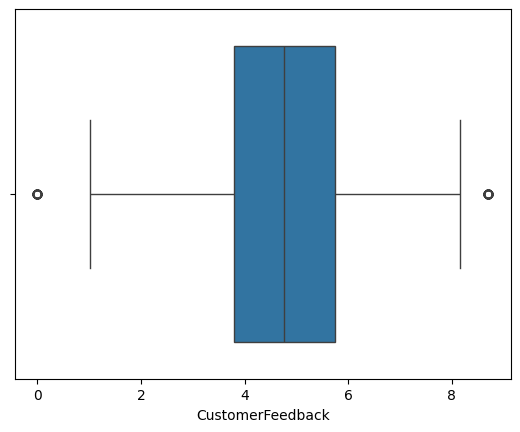

In [48]:
# Analiza las variables numéricas para detectar outliers. 
# ¿Cómo? A través de inspección visual, utilizando métodos estadísticos como el Z Score o el IQR, etc
sns.boxplot(data=df_no_outliers, x='CustomerFeedback')

Variables numéricas a gestionar: Quantity y CustomerFeedback

In [54]:
# Gestiona estos outliers
# CustomerFeedback

Q1 = df_no_outliers['CustomerFeedback'].quantile(0.25)
Q3 = df_no_outliers['CustomerFeedback'].quantile(0.75)
IQR = Q3 - Q1

outliers_CF = df_no_outliers[(df_no_outliers['CustomerFeedback'] < (Q1-1.5*IQR)) | (df_no_outliers['CustomerFeedback'] > (Q3+1.5*IQR))]
outliers_CF['CustomerFeedback'].value_counts()

CustomerFeedback
8.704556    45
0.000000    42
Name: count, dtype: int64

Si volvemos a la definición de CustomerFeedback nos encontramos con que la definición es "valores de entre el 1 al 10", así que los 45 valores estarían dentro del rango y los 42 ceros puede ser que simplemente los clientes no hayan dado una valoración. En el gráfico realmente lo que podemos deducir es que la mayoría de valoraciones están entre el 4 y el 6 y por lo tanto no serían outliers.

In [56]:
df_no_outliers['CustomerFeedback'] = df_no_outliers['CustomerFeedback'].replace(0., df_no_outliers['CustomerFeedback'].mean())

En variables categóricas, así como la variable del tiempo, quizá no podemos hablar de outliers propiamente pero vamos a anlizarlas a ver si hay algún caso raro que debamos gestionar.

In [59]:
# Analiza los valores únicos de las variables categóricas y gestiona los casos raros
columns_to_explore = ['ProductCategory', 'PaymentMethod', 'ReturnStatus']

for column in columns_to_explore:
    print(column, ":", df_no_outliers[column].unique(), "\n")

ProductCategory : ['Books' 'Home Goods' 'Electronics' 'Clothing' 'Accessories'] 

PaymentMethod : ['Credit Card' 'Bank Transfer' 'PayPal'] 

ReturnStatus : ['Yes' 'No'] 



In [58]:
df_no_outliers['ProductCategory'] = df_no_outliers['ProductCategory'].replace('books', 'Books')

In [62]:
# Analiza el rango de fechas del dataset y, si es necesario, gestiona los casos raros
print(df_no_outliers['TransactionDate'].min())
print(df_no_outliers['TransactionDate'].max())

2023-01-01 00:19:58
2023-12-31 23:50:44


Los datos de la fecha serían correctos porque en la descripción del dataset nos decía que pertenecía al año 2023 en completo.

### 2.4 Gestión de duplicados

In [63]:
# Analiza si hay duplicados en el dataset, en general o por un subset de las columnas
df_sin_duplicados = df_no_outliers.copy()

In [64]:
df_sin_duplicados.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5045     True
5046     True
5047     True
5048     True
5049     True
Length: 5050, dtype: bool

***

## 3. Feature Engineering: creación de nuevas variables
En algunos casos, podemos crear nuevas variables a partir de las que ya tenemos, que puedan enriquecer el análisis.

In [43]:
# ¿Qué variables podría ser interesante crear?
# Algunas ideas con pistas, enfocadas en el análisis que queremos hacer:
# - Nos piden hacer un análisis de la facturación total por meses
# - Nos piden segmentar los productos y categorías de productos por el feedback recibido, para saber los que peor valoración tienen

***

In [44]:
df_cleaned.head()

NameError: name 'df_cleaned' is not defined

## 4. Combinación con otros datasets
Además del dataset de transacciones, contamos con un dataset sobre los clientes, que podremos utilizar para hacer análisis más completos.

In [ ]:
# Carga el dataset
df_customers = 

In [13]:
df_customers.head()

,CustomerID,Location,Age,Gender,CustomerSince,LoyaltyPoints
0,CUST1012,Los Angeles,46,Female,2022-09-02,3828
1,CUST1125,NY,60,Other,2023-11-28,1008
2,CUST1377,LA,28,Male,2022-09-29,1229
3,CUST1379,Phoenix,35,Female,2023-03-16,1035
4,CUST1044,Los Angeles,64,Male,2022-08-27,4585


In [15]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     501 non-null    object
 1   Location       501 non-null    object
 2   Age            501 non-null    int64 
 3   Gender         501 non-null    object
 4   CustomerSince  501 non-null    object
 5   LoyaltyPoints  501 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [18]:
# Cambiamos tipo de variable de CustomerSince

df_customers['CustomerSince'] = pd.to_datetime(df_customers['CustomerSince'], format = '%Y-%m-%d')

In [19]:
df_customers

,CustomerID,Location,Age,Gender,CustomerSince,LoyaltyPoints
0,CUST1012,Los Angeles,46,Female,2022-09-02,3828
1,CUST1125,NY,60,Other,2023-11-28,1008
2,CUST1377,LA,28,Male,2022-09-29,1229
3,CUST1379,Phoenix,35,Female,2023-03-16,1035
4,CUST1044,Los Angeles,64,Male,2022-08-27,4585
...,...,...,...,...,...,...
496,CUST1438,Phoenix,35,Male,2022-01-01,4878
497,CUST1114,NY,57,Female,2022-04-29,2320
498,CUST1106,Chicago,25,Male,2022-02-04,935
499,CUST1499,Los Angeles,56,Male,2022-07-17,2230


<Axes: xlabel='Age'>

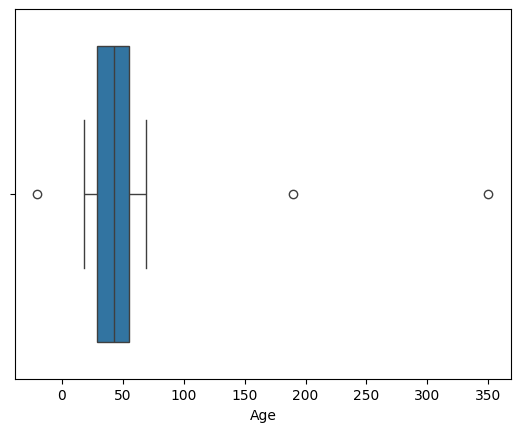

In [20]:
sns.boxplot(data=df_customers, x='Age')

<Axes: xlabel='LoyaltyPoints', ylabel='Count'>

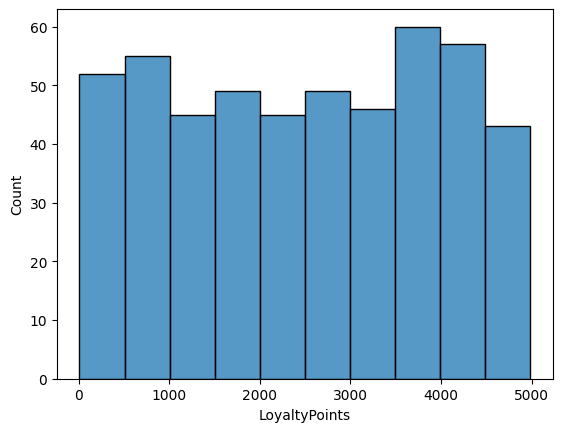

In [22]:
sns.histplot(data=df_customers, x='LoyaltyPoints')

In [32]:
# Gestionamos los outliers de Age utilizando Zscore
# from scipy.stats import zscore
print('Media: ', df_customers['Age'].mean())
print('STD: ', df_customers['Age'].std())
print(df_customers['Age'].head())
df_customers['Age_zscore'] = zscore(df_customers['Age'])
df_customers.head()

Media:  43.395209580838326
STD:  21.62867302924495
0    46
1    60
2    28
3    35
4    64
Name: Age, dtype: int64


,CustomerID,Location,Age,Gender,CustomerSince,LoyaltyPoints,Age_zscore
0,CUST1012,Los Angeles,46,Female,2022-09-02,3828,0.120553
1,CUST1125,NY,60,Other,2023-11-28,1008,0.768489
2,CUST1377,LA,28,Male,2022-09-29,1229,-0.712508
3,CUST1379,Phoenix,35,Female,2023-03-16,1035,-0.388540
4,CUST1044,Los Angeles,64,Male,2022-08-27,4585,0.953613


In [34]:
age_outliers = df_customers[abs(df_customers['Age_zscore'])>3]

In [35]:
df_customers.loc[age_outliers.index, 'Age'] = df_customers['Age'].median()

<Axes: xlabel='Age'>

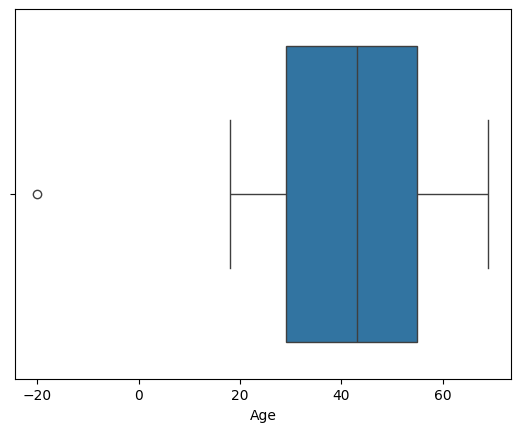

In [36]:
sns.boxplot(data=df_customers, x='Age')

In [37]:
df_customers['Age'] = df_customers['Age'].replace(-20, df_customers['Age'].median())

In [38]:
df_customers_cleaned = df_customers.copy()

In [39]:
# Gestionamos los diferentes valores que hay en Location
df_customers_cleaned['Location'].unique()

array(['Los Angeles', 'NY', 'LA', 'Phoenix', 'Houston', 'New York',
       'Chicago'], dtype=object)

In [42]:
df_customers_cleaned['Location'] = df_customers_cleaned['Location'].replace({'NY': 'New York', 'LA': 'Los Angeles'})
df_customers_cleaned['Location'].unique()

array(['Los Angeles', 'New York', 'Phoenix', 'Houston', 'Chicago'],
      dtype=object)

In [45]:
# ¿Hay duplicados?
df_customers_cleaned.duplicated().sum()

0

In [ ]:
# Haz un análisis general del dataset para entender qué columnas tiene

In [ ]:
# ¿Hace falta gestionar algún null, tipo de variable, outlier o duplicado como hemos hecho previamente?


Una vez hemos entendido y limpiado (en caso de ser necesario) el dataset sobre clientes, nos proponemos contestar las siguientes preguntas: <n>

¿Dónde vendemos más productos? ¿Y qué categoría de productos? ¿Quiénes son nuestros clientes?

In [ ]:
# Guía para hacer joins en pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join

# ¿Qué tipo de join es más apropiado en este caso? 

In [ ]:
df_merged = pd.merged(df_cleaned, df_customers_cleaned, on='CustomerID', how='left')
df_merged.head()

***

In [48]:
df_customers_cleaned[df_customers_cleaned['CustomerID'] == 'CUST1012']

,CustomerID,Location,Age,Gender,CustomerSince,LoyaltyPoints,Age_zscore
0,CUST1012,Los Angeles,46,Female,2022-09-02,3828,0.120553


In [ ]:
# Contestar preguntas_ conteo de pedidos por Localización
df_merged.groupby('Location').size()

In [ ]:
transactions_by_location = df_merged.groupby('Location').size().reset_index(name='TransactionCount')
print(transactions_by_location.head())

In [ ]:
sns.barplot(data=transactions_by_location, x='Location', y='TransactionCount', hue='Location', palette='viridis')

## 5. Análisis de negocio
Una vez hemos limpiado y preparado nuestros datasets, podemos hacer un análisis más enfocado a negocio. ¿Qué ocurrirá? Que a medida que vayamos planteando preguntas, tendremos que hacer ajustes similares a los que ya hemos hecho, generando nuevas variables y ajustando los datos al objetivo concreto.

## Entender el comportamiento de compra

Analizar la frecuencia de compra, el tamaño de compra media y los productos más populares.

In [ ]:
# ¿Cuántas transacciones realiza cada cliente?
purchase_frequency = df_merged.groupby('CustomerID')['TransactionID'].nunique().reset_index(name='PurchaseFrequency')

print(purchase_frequency.sort_values(by='PurchaseFrequency', ascending=False).head(6))

In [ ]:
top_5_clients = []
for client in top_5_clients:
    print('Client: ', client)
    print(df_customers_cleaned[df_customers_cleaned['CustomerID'] == client])

In [ ]:
# ¿Cuánto se gastan de media nuestros clientes?
average_purchase_by_location = df_merged.groupby(['CustomerID', 'Location'])['TotalAmount'].mean().reset_index(name='AveragePurchase')

In [ ]:
sns.boxplot()

## Entender la satisfacción del cliente con nuestros productos

Analizamos las valoraciones de los productos.